In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  #Does not raise warning when doing in-place data manipulation
pd.options.display.max_columns = 999

In [7]:
# Examining the datasets

#parse_dates enable reading a column as a TimeStamp
train_df = pd.read_csv('train_2016_v2.csv', parse_dates=['transactiondate'])  

train_df.shape

(90275, 3)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


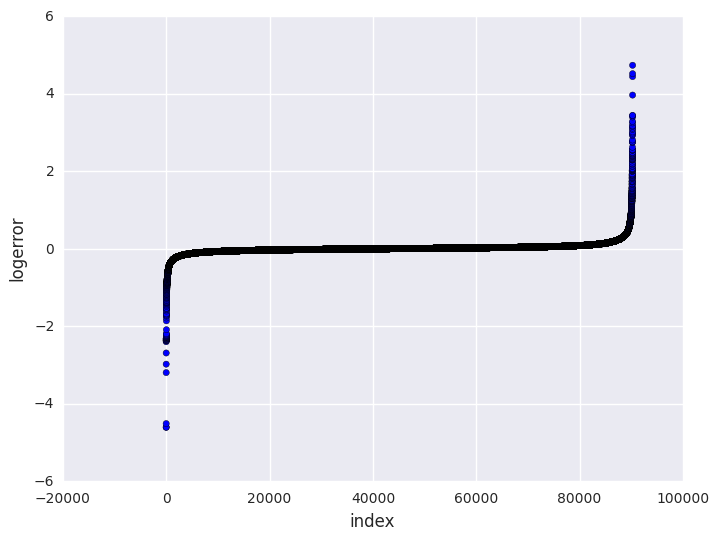

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

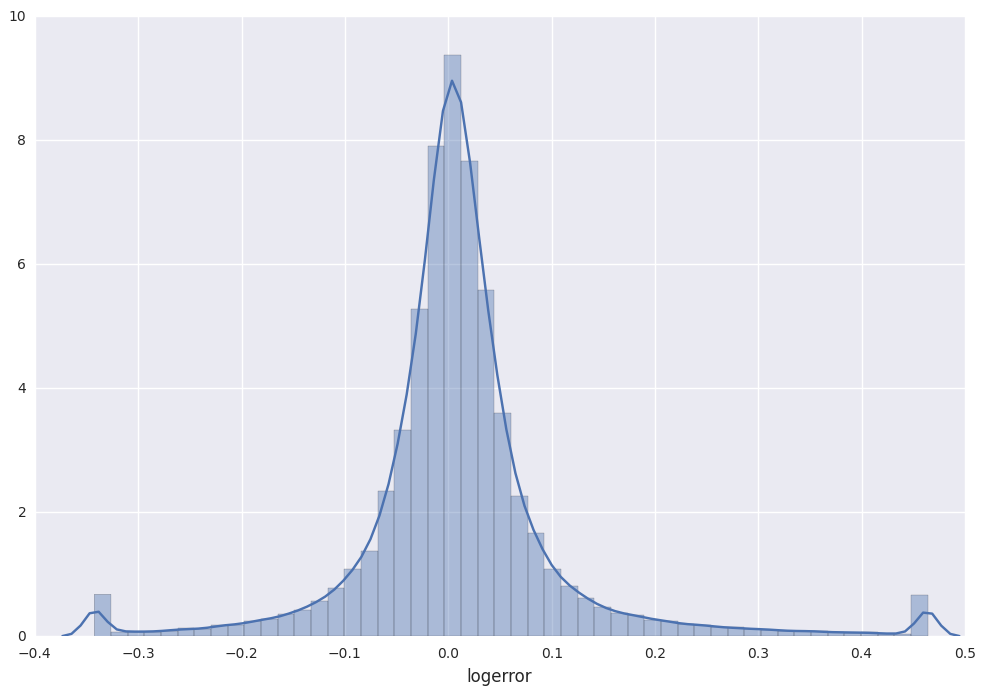

In [10]:
# Removing the outliers
uplimit = np.percentile(train_df.logerror.values, 99)
lowlimit = np.percentile(train_df.logerror.values, 1)

train_df['logerror'].ix[train_df['logerror'] > uplimit] = uplimit
train_df['logerror'].ix[train_df['logerror'] < lowlimit] = lowlimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50)
plt.xlabel('logerror', fontsize=12)
plt.show()

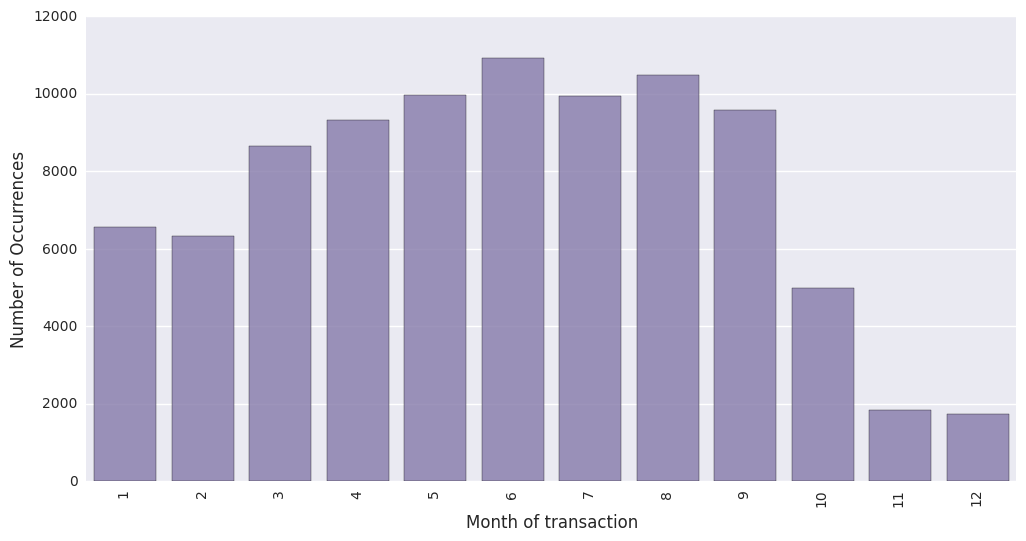

In [13]:
# Exploring how many transactions happened per month

train_df['transactionmonth'] = train_df['transactiondate'].dt.month

months_cardinality = train_df['transactionmonth'].value_counts()
plt.figure(figsize=(12,6))

sns.barplot(months_cardinality.index, months_cardinality.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()